<a href="https://colab.research.google.com/github/aali160-glitch/Teacher_Feedback/blob/main/Teacher_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("teacher_survey_data_.csv")

In [3]:
df
df.shape
df.sample(5)

,TeacherID,Date,A1 - The teacher explains complex concepts in a clear and understandable manner.,A2 - The teacher breaks down difficult material into manageable and logical learning steps.,A3 - The teacher uses relevant examples and real-world applications to illustrate topics effectively.,"B1 - The teacher effectively uses digital tools (presentations, videos, apps, online resources) to enhance learning.",B2 - The teacher uses technology to provide timely and constructive feedback on assignments.,B3 - The digital materials and resources shared by the teacher are easily accessible and helpful for self-study.,C1 - The teacher makes lessons engaging and maintains my interest throughout the class.,C2 - The teacher creates a supportive environment where I feel comfortable asking questions and seeking help.,"C3 - The teacher encourages active participation, critical thinking, and meaningful interaction with the material."
24573,T042,18/02/2024,Strongly Disagree,Agree,Strongly Agree,Neutral,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Agree
2521,T005,26/05/2024,Disagree,Disagree,Disagree,Disagree,Disagree,Strongly Agree,Disagree,Strongly Agree,Neutral
21656,T037,20/08/2024,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Disagree
8129,T014,26/02/2024,Strongly Disagree,Strongly Disagree,Neutral,Strongly Disagree,Disagree,Neutral,Agree,Neutral,Disagree
24822,T042,26/05/2024,Strongly Agree,Strongly Agree,Agree,Neutral,Agree,Disagree,Strongly Agree,Neutral,Strongly Agree


In [4]:
import pandas as pd
import numpy as np

# Sample: replace these with your actual column names from df
question_cols = df.columns[3:].tolist()  # everything after TeacherID and Date

teachers_to_add = ['T012', 'T021']
feedback_date = '01/11/2024'
num_students = 105

# Map numeric to response text
response_map = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly Agree'
}

new_rows = []

for teacher in teachers_to_add:
    for _ in range(num_students):
        row = {
            'TeacherID': teacher,
            'Date': feedback_date
        }
        # Fill each question column
        for q in question_cols:
            if q.startswith('A'):
                row[q] = response_map[np.random.choice([4,5])]  # Section A high
            elif q.startswith('B'):
                row[q] = response_map[np.random.choice([1,2])]  # Section B low
            elif q.startswith('C'):
                row[q] = response_map[np.random.choice([4,5])]  # Section C high
            else:
                row[q] = 'Neutral'  # fallback
        new_rows.append(row)

# Create DataFrame
new_df = pd.DataFrame(new_rows)

# Concatenate with original df
df = pd.concat([new_df, df], ignore_index=True)

print(f"Added {len(new_rows)} simulated student responses for teachers {teachers_to_add}")


Added 210 simulated student responses for teachers ['T012', 'T021']


#Tranformation for Easy Analysis


In [5]:
likert_map = {                # Likert Map to Map Categorial Scores to Numerical Weights
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

id_vars = ["TeacherID", "Date"]

question_cols = [col for col in df.columns if col not in id_vars] # Fetching All Question Variables
df_long = df.melt(
    id_vars=id_vars,
    value_vars=question_cols,
    var_name="Question",
    value_name="ResponseText"
)
df_long["Section"] = df_long["Question"].str[0]
df_long["QuestionID"] = df_long["Question"].str.extract(r"(A\d|B\d|C\d)")

df_long.drop(columns="Question", inplace=True)
df_long["ResponseScore"] = df_long["ResponseText"].map(likert_map)


df_transformed = df_long[
    ["TeacherID", "Date", "Section", "QuestionID", "ResponseText", "ResponseScore"]
]




In [6]:
df_transformed.sample(12)

,TeacherID,Date,Section,QuestionID,ResponseText,ResponseScore
240129,T039,22/05/2024,C,C3,Disagree,2.0
278517,T050,27/05/2024,A,A1,Agree,4.0
123023,T049,19/05/2024,B,B2,Agree,4.0
64284,T004,20/08/2024,B,B1,Neutral,3.0
107291,T024,20/05/2024,B,B2,Strongly Agree,5.0
70186,T013,18/08/2024,B,B1,Neutral,3.0
85702,T040,21/05/2024,B,B1,Neutral,3.0
183867,T047,18/11/2024,C,C1,Disagree,2.0
183248,T047,17/02/2024,C,C1,Neutral,3.0
15215,T025,20/05/2024,A,A2,Neutral,3.0


In [6]:
df_transformed.isna().sum()
df_transformed["ResponseScore"].unique()
df_transformed["Section"].value_counts()
# Seeing if there is any Null or If any Response is UnEven


,count
Section,
A,92961
B,92961
C,92961


#Section Wise Scores for Each Teacher
* (A) **Teaching Experience**
* (B) **Tools and Technology Integration**
* (C) **Student-Centred Approach**

In [7]:
import pandas as pd
import numpy as np

# Use df_transformed instead of df
df = df_transformed.copy()

print("Using df_transformed DataFrame...")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Show sample
print("\nFirst few rows:")
print(df.head())

# Fix date parsing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])

# Now organize with correct column names
df['YearMonth'] = df['Date'].dt.to_period('M')

# Identify feedback cycles (Feb, May, Aug, Nov)
feedback_months = [2, 5, 8, 11]

def assign_feedback_cycle(date):
    month = date.month
    year = date.year

    # Check if month is a feedback month
    if month in feedback_months:
        cycle_index = feedback_months.index(month)
        return f"{year}_Cycle_{cycle_index + 1}"
    else:
        # Find nearest feedback month
        for i, feedback_month in enumerate(feedback_months):
            if month <= feedback_month:
                return f"{year}_Cycle_{i + 1}"
        # If beyond November, assign to next year's first cycle
        return f"{year + 1}_Cycle_1"

df['FeedbackCycle'] = df['Date'].apply(assign_feedback_cycle)

# Create numeric cycle number for sorting
df['CycleNumber'] = df['FeedbackCycle'].str.extract(r'_Cycle_(\d+)').astype(int)
df['CycleYear'] = df['FeedbackCycle'].str.extract(r'(\d+)_').astype(int)

# Sort by TeacherID and Date
df = df.sort_values(['TeacherID', 'Date'])

print("\n" + "="*80)
print("DATA ORGANIZATION COMPLETE")
print("="*80)

print(f"\nTotal rows: {len(df):,}")
print(f"Total unique teachers: {df['TeacherID'].nunique()}")
print(f"Total unique feedback cycles: {df['FeedbackCycle'].nunique()}")
print(f"\nFeedback cycles distribution:")
print(df['FeedbackCycle'].value_counts().sort_index())

print("\nSample of organized data (first 2 teachers):")
sample_teachers = df['TeacherID'].unique()[:2]
for teacher in sample_teachers:
    teacher_data = df[df['TeacherID'] == teacher].head(5)
    print(f"\nTeacher {teacher}:")

    # Use the actual column names
    available_cols = []
    for col in ['Date', 'FeedbackCycle', 'Section', 'QuestionID', 'ResponseScore', 'ResponseText']:
        if col in df.columns:
            available_cols.append(col)

    print(teacher_data[available_cols].to_string(index=False))

Using df_transformed DataFrame...
DataFrame shape: (278883, 6)
Columns: ['TeacherID', 'Date', 'Section', 'QuestionID', 'ResponseText', 'ResponseScore']

First few rows:
  TeacherID        Date Section QuestionID    ResponseText  ResponseScore
0      T012  01/11/2024       A         A2           Agree            4.0
1      T012  01/11/2024       A         A2  Strongly Agree            5.0
2      T012  01/11/2024       A         A2           Agree            4.0
3      T012  01/11/2024       A         A2           Agree            4.0
4      T012  01/11/2024       A         A2           Agree            4.0

DATA ORGANIZATION COMPLETE

Total rows: 277,407
Total unique teachers: 50
Total unique feedback cycles: 4

Feedback cycles distribution:
FeedbackCycle
2024_Cycle_1    92547
2024_Cycle_2    92007
2024_Cycle_3    76068
2024_Cycle_4    16785
Name: count, dtype: int64

Sample of organized data (first 2 teachers):

Teacher T001:
      Date FeedbackCycle Section QuestionID  ResponseScore  

In [8]:
# Step 2: Teacher Ranking by Average Score Across All Feedback Cycles

print("\n" + "="*80)
print("TEACHER PERFORMANCE ANALYSIS")
print("="*80)

print("\nChecking ResponseScore statistics:")
print(f"ResponseScore min: {df['ResponseScore'].min()}")
print(f"ResponseScore max: {df['ResponseScore'].max()}")
print(f"ResponseScore mean: {df['ResponseScore'].mean():.2f}")
print(f"ResponseScore std: {df['ResponseScore'].std():.2f}")

# Calculate teacher performance metrics
teacher_performance = df.groupby('TeacherID').agg({
    'ResponseScore': ['mean', 'median', 'std', 'count'],
    'FeedbackCycle': 'nunique'
}).round(2)

# Flatten column names
teacher_performance.columns = ['Avg_Score', 'Median_Score', 'Std_Dev', 'Total_Responses', 'Num_Cycles']

# Add additional metrics
teacher_performance['Expected_Responses'] = teacher_performance['Num_Cycles'] * 200 * 9
teacher_performance['Response_Rate'] = (teacher_performance['Total_Responses'] / teacher_performance['Expected_Responses'] * 100).round(1)

# Create rankings
teacher_performance['Rank_Overall'] = teacher_performance['Avg_Score'].rank(ascending=False, method='min').astype(int)
teacher_performance['Rank_Consistency'] = teacher_performance['Std_Dev'].rank(ascending=True, method='min').astype(int)

# Calculate scores by section (if Section column exists)
if 'Section' in df.columns:
    print("\nCalculating section-wise performance...")
    section_scores = df.groupby(['TeacherID', 'Section'])['ResponseScore'].mean().unstack()

    # Rename columns to avoid string comparison issues
    section_scores = section_scores.rename(columns={'A': 'Section_A_Score', 'B': 'Section_B_Score', 'C': 'Section_C_Score'})

    # Calculate weakest and strongest sections using numeric comparison
    # We need to compare the actual scores, not column names
    section_scores['Strongest_Section'] = section_scores.apply(
        lambda row: 'A' if row['Section_A_Score'] == max(row['Section_A_Score'], row['Section_B_Score'], row['Section_C_Score'])
        else ('B' if row['Section_B_Score'] == max(row['Section_A_Score'], row['Section_B_Score'], row['Section_C_Score'])
              else 'C'), axis=1
    )

    section_scores['Weakest_Section'] = section_scores.apply(
        lambda row: 'A' if row['Section_A_Score'] == min(row['Section_A_Score'], row['Section_B_Score'], row['Section_C_Score'])
        else ('B' if row['Section_B_Score'] == min(row['Section_A_Score'], row['Section_B_Score'], row['Section_C_Score'])
              else 'C'), axis=1
    )

    # Merge with main performance dataframe
    teacher_performance = pd.merge(teacher_performance, section_scores, left_index=True, right_index=True, how='left')

    # Calculate section rankings
    for section in ['A', 'B', 'C']:
        col_name = f'Section_{section}_Score'
        if col_name in teacher_performance.columns:
            teacher_performance[f'Rank_Section_{section}'] = teacher_performance[col_name].rank(ascending=False, method='min').astype(int)

# Calculate improvement score (last cycle vs first cycle)
print("\nCalculating improvement scores...")
teacher_cycles = df.groupby(['TeacherID', 'FeedbackCycle'])['ResponseScore'].mean().unstack()

def calculate_improvement(teacher_scores):
    if len(teacher_scores.dropna()) >= 2:
        sorted_cycles = sorted(teacher_scores.dropna().index)
        first_score = teacher_scores[sorted_cycles[0]]
        last_score = teacher_scores[sorted_cycles[-1]]
        return last_score - first_score
    return np.nan

teacher_performance['Improvement_Score'] = teacher_cycles.apply(calculate_improvement, axis=1)
teacher_performance['Improvement_Rank'] = teacher_performance['Improvement_Score'].rank(ascending=False, method='min').astype(int)

# Create performance categories
def categorize_performance(avg_score):
    if avg_score >= 4.5:
        return 'Excellent'
    elif avg_score >= 4.0:
        return 'Good'
    elif avg_score >= 3.5:
        return 'Satisfactory'
    elif avg_score >= 3.0:
        return 'Needs Improvement'
    else:
        return 'Poor'

teacher_performance['Performance_Category'] = teacher_performance['Avg_Score'].apply(categorize_performance)

# Sort by overall rank
teacher_performance = teacher_performance.sort_values('Rank_Overall')

print("\n" + "="*80)
print("TEACHER PERFORMANCE RANKING REPORT")
print("="*80)

print(f"\nTotal Teachers Analyzed: {len(teacher_performance)}")
print(f"\nPerformance Distribution:")
performance_dist = teacher_performance['Performance_Category'].value_counts()
for category, count in performance_dist.items():
    percentage = (count / len(teacher_performance) * 100)
    print(f"  {category}: {count} teachers ({percentage:.1f}%)")

print("\n" + "-"*80)
print("TOP 10 TEACHERS OVERALL")
print("-"*80)
display_cols = ['Avg_Score', 'Rank_Overall', 'Num_Cycles', 'Performance_Category', 'Std_Dev']
if 'Section_A_Score' in teacher_performance.columns:
    display_cols.extend(['Section_A_Score', 'Section_B_Score', 'Section_C_Score'])

top_10 = teacher_performance[display_cols].head(10)
print(top_10.to_string())

print("\n" + "-"*80)
print("BOTTOM 10 TEACHERS OVERALL")
print("-"*80)
bottom_10 = teacher_performance[display_cols].tail(10)
print(bottom_10.to_string())

print("\n" + "-"*80)
print("MOST IMPROVED TEACHERS (Positive Improvement)")
print("-"*80)
most_improved = teacher_performance[teacher_performance['Improvement_Score'] > 0].sort_values('Improvement_Score', ascending=False)
if not most_improved.empty:
    print(most_improved[['Avg_Score', 'Improvement_Score', 'Improvement_Rank', 'Num_Cycles']].head(10).to_string())
else:
    print("No teachers showed positive improvement")

print("\n" + "-"*80)
print("MOST DECLINED TEACHERS (Negative Improvement)")
print("-"*80)
most_declined = teacher_performance[teacher_performance['Improvement_Score'] < 0].sort_values('Improvement_Score')
if not most_declined.empty:
    print(most_declined[['Avg_Score', 'Improvement_Score', 'Improvement_Rank', 'Num_Cycles']].head(10).to_string())
else:
    print("No teachers showed decline")

# Add summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nOverall Average Score: {teacher_performance['Avg_Score'].mean():.2f}")
print(f"Score Range: {teacher_performance['Avg_Score'].min():.2f} to {teacher_performance['Avg_Score'].max():.2f}")
print(f"Average Standard Deviation (Consistency): {teacher_performance['Std_Dev'].mean():.2f}")
print(f"Average Cycles per Teacher: {teacher_performance['Num_Cycles'].mean():.1f}")

if 'Improvement_Score' in teacher_performance.columns:
    valid_improvements = teacher_performance['Improvement_Score'].dropna()
    if len(valid_improvements) > 0:
        print(f"\nTeachers with 2+ cycles for improvement analysis: {len(valid_improvements)}")
        print(f"Average Improvement Score: {valid_improvements.mean():.3f}")
        print(f"Teachers improving: {(valid_improvements > 0).sum()} ({((valid_improvements > 0).sum()/len(valid_improvements)*100):.1f}%)")
        print(f"Teachers declining: {(valid_improvements < 0).sum()} ({((valid_improvements < 0).sum()/len(valid_improvements)*100):.1f}%)")

# Save the teacher performance results for further analysis
teacher_performance.to_csv('teacher_performance_analysis.csv')
print(f"\nTeacher performance analysis saved to 'teacher_performance_analysis.csv'")


TEACHER PERFORMANCE ANALYSIS

Checking ResponseScore statistics:
ResponseScore min: 1.0
ResponseScore max: 5.0
ResponseScore mean: 3.65
ResponseScore std: 1.19

Calculating section-wise performance...

Calculating improvement scores...

TEACHER PERFORMANCE RANKING REPORT

Total Teachers Analyzed: 50

Performance Distribution:
  Good: 20 teachers (40.0%)
  Poor: 11 teachers (22.0%)
  Satisfactory: 10 teachers (20.0%)
  Needs Improvement: 9 teachers (18.0%)

--------------------------------------------------------------------------------
TOP 10 TEACHERS OVERALL
--------------------------------------------------------------------------------
           Avg_Score  Rank_Overall  Num_Cycles Performance_Category  Std_Dev  Section_A_Score  Section_B_Score  Section_C_Score
TeacherID                                                                                                                      
T020            4.45             1           3                 Good     0.88         4.436137   

#Visual Representation of Data

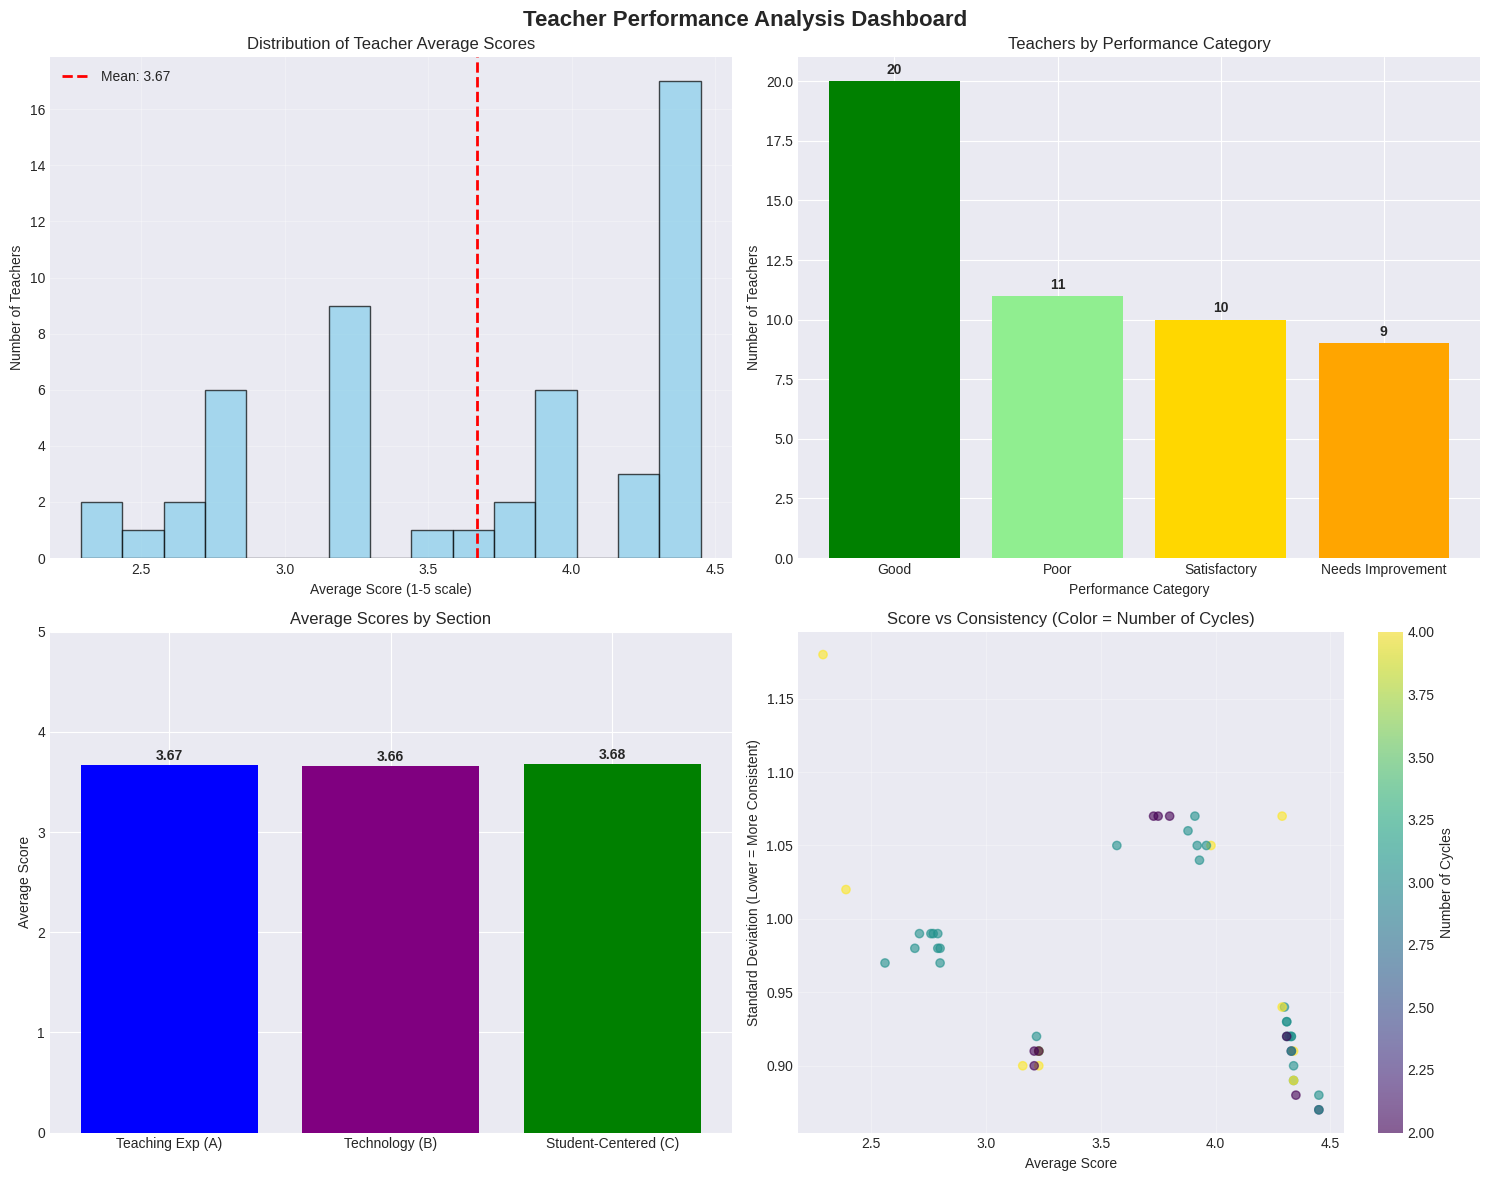

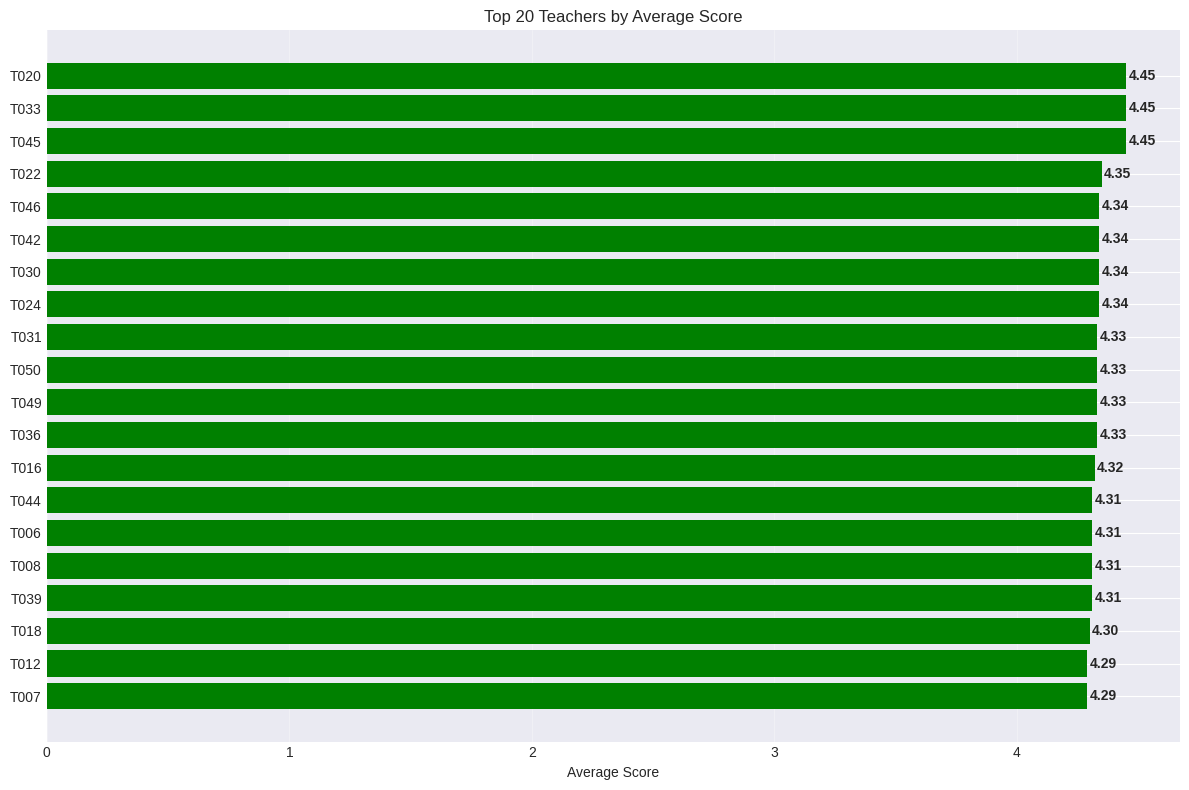

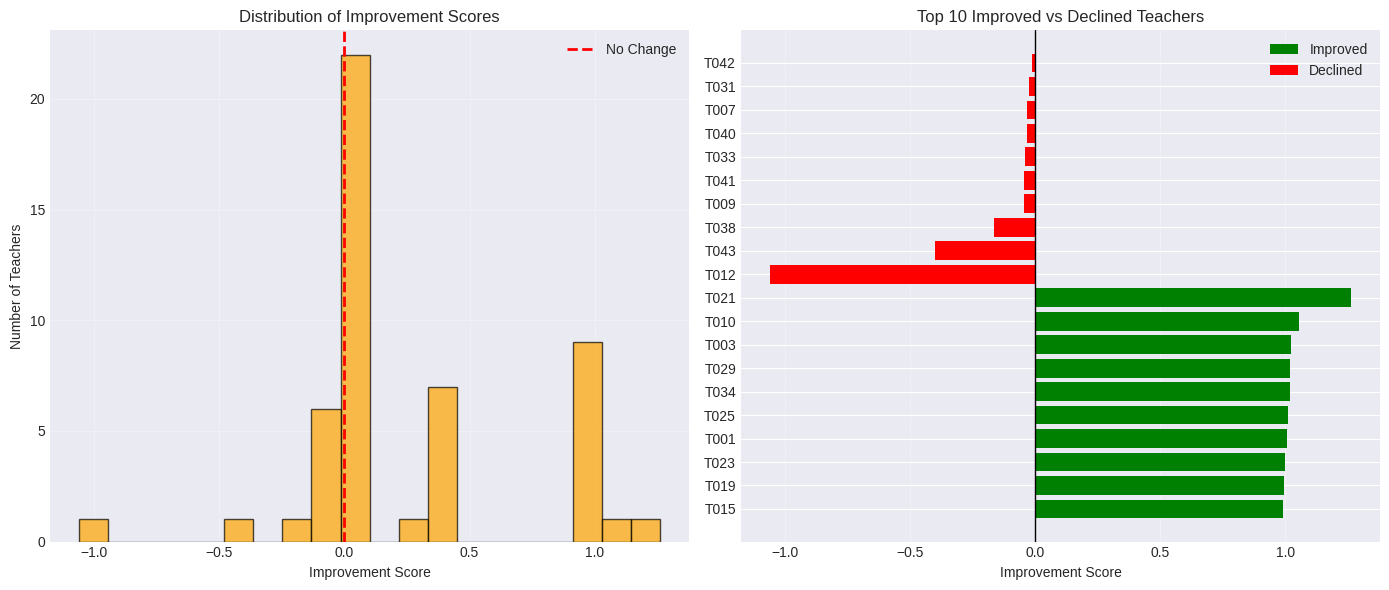

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Teacher Performance Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Overall Score Distribution
axes[0, 0].hist(teacher_performance['Avg_Score'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(teacher_performance['Avg_Score'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {teacher_performance["Avg_Score"].mean():.2f}')
axes[0, 0].set_xlabel('Average Score (1-5 scale)')
axes[0, 0].set_ylabel('Number of Teachers')
axes[0, 0].set_title('Distribution of Teacher Average Scores')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Performance Categories
category_counts = teacher_performance['Performance_Category'].value_counts()
colors = ['green', 'lightgreen', 'gold', 'orange', 'red']
axes[0, 1].bar(category_counts.index, category_counts.values, color=colors)
axes[0, 1].set_xlabel('Performance Category')
axes[0, 1].set_ylabel('Number of Teachers')
axes[0, 1].set_title('Teachers by Performance Category')
for i, v in enumerate(category_counts.values):
    axes[0, 1].text(i, v + 0.3, str(v), ha='center', fontweight='bold')

# 3. Section-wise Performance Comparison
if 'Section_A_Score' in teacher_performance.columns:
    sections_data = teacher_performance[['Section_A_Score', 'Section_B_Score', 'Section_C_Score']].mean()
    section_labels = ['Teaching Exp (A)', 'Technology (B)', 'Student-Centered (C)']
    axes[1, 0].bar(section_labels, sections_data.values, color=['blue', 'purple', 'green'])
    axes[1, 0].set_ylabel('Average Score')
    axes[1, 0].set_title('Average Scores by Section')
    axes[1, 0].set_ylim([0, 5])
    for i, v in enumerate(sections_data.values):
        axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Section data not available', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Section-wise Performance')

# 4. Score vs Consistency
scatter = axes[1, 1].scatter(teacher_performance['Avg_Score'], teacher_performance['Std_Dev'],
                            alpha=0.6, c=teacher_performance['Num_Cycles'], cmap='viridis')
axes[1, 1].set_xlabel('Average Score')
axes[1, 1].set_ylabel('Standard Deviation (Lower = More Consistent)')
axes[1, 1].set_title('Score vs Consistency (Color = Number of Cycles)')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Number of Cycles')

plt.tight_layout()
plt.show()

# Additional visualization: Top 20 teachers
plt.figure(figsize=(12, 8))
top_20 = teacher_performance.head(20)
bars = plt.barh(top_20.index, top_20['Avg_Score'], color='green')
plt.xlabel('Average Score')
plt.title('Top 20 Teachers by Average Score')
plt.gca().invert_yaxis()  # Highest score at top

# Add score labels
for bar, score in zip(bars, top_20['Avg_Score']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{score:.2f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Improvement analysis visualization
if 'Improvement_Score' in teacher_performance.columns and teacher_performance['Improvement_Score'].notna().any():
    plt.figure(figsize=(14, 6))

    # Filter teachers with valid improvement scores
    valid_improvement = teacher_performance.dropna(subset=['Improvement_Score'])

    if len(valid_improvement) > 0:
        # Sort by improvement score
        valid_improvement = valid_improvement.sort_values('Improvement_Score')

        plt.subplot(1, 2, 1)
        plt.hist(valid_improvement['Improvement_Score'], bins=20, edgecolor='black', alpha=0.7, color='orange')
        plt.axvline(0, color='red', linestyle='--', linewidth=2, label='No Change')
        plt.xlabel('Improvement Score')
        plt.ylabel('Number of Teachers')
        plt.title('Distribution of Improvement Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        # Top 10 improved vs declined
        top_improved = valid_improvement[valid_improvement['Improvement_Score'] > 0].tail(10)
        top_declined = valid_improvement[valid_improvement['Improvement_Score'] < 0].head(10)

        if not top_improved.empty:
            plt.barh(top_improved.index, top_improved['Improvement_Score'], color='green', label='Improved')
        if not top_declined.empty:
            plt.barh(top_declined.index, top_declined['Improvement_Score'], color='red', label='Declined')

        plt.axvline(0, color='black', linestyle='-', linewidth=1)
        plt.xlabel('Improvement Score')
        plt.title('Top 10 Improved vs Declined Teachers')
        plt.legend()
        plt.grid(True, alpha=0.3, axis='x')

        plt.tight_layout()
        plt.show()

#Trend Analysis

In [11]:
# Average score per teacher per cycle
teacher_cycle_scores = (
    df.groupby(['TeacherID', 'CycleNumber'])['ResponseScore']
      .mean()
      .reset_index()
      .sort_values(['TeacherID', 'CycleNumber'])
)


In [12]:
#Trend Slope Per Teacher
import numpy as np

def compute_trend_slope(sub_df):
    if len(sub_df) < 2:
        return np.nan
    x = sub_df['CycleNumber'].values
    y = sub_df['ResponseScore'].values
    slope = np.polyfit(x, y, 1)[0]
    return slope

trend_slopes = (
    teacher_cycle_scores
    .groupby('TeacherID')
    .apply(compute_trend_slope)
    .rename('Trend_Slope')
)


/tmp/ipython-input-2424929384.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_trend_slope)


In [13]:
teacher_performance = teacher_performance.merge(
    trend_slopes,
    left_index=True,
    right_index=True,
    how='left'
)


In [14]:
def classify_trend(row):
    slope = row['Trend_Slope']
    std = row['Std_Dev']

    if pd.isna(slope):
        return 'Insufficient Data'

    if slope > 0.05:
        trend = 'Improving'
    elif slope < -0.05:
        trend = 'Declining'
    else:
        trend = 'Stable'

    # Volatility overlay
    if std >= 0.60:
        return f'Volatile ({trend})'

    return trend

teacher_performance['Trend_Category'] = teacher_performance.apply(classify_trend, axis=1)


In [15]:
print("\n" + "="*80)
print("TEACHER TREND CLASSIFICATION SUMMARY")
print("="*80)

trend_dist = teacher_performance['Trend_Category'].value_counts()

for trend, count in trend_dist.items():
    pct = count / len(teacher_performance) * 100
    print(f"{trend}: {count} teachers ({pct:.1f}%)")



TEACHER TREND CLASSIFICATION SUMMARY
Volatile (Stable): 28 teachers (56.0%)
Volatile (Improving): 19 teachers (38.0%)
Volatile (Declining): 3 teachers (6.0%)


In [16]:
print("\nTOP IMPROVING TEACHERS (By Trend Slope)")
display(
    teacher_performance
    .sort_values('Trend_Slope', ascending=False)
    [['Avg_Score', 'Trend_Slope', 'Std_Dev', 'Num_Cycles', 'Trend_Category']]
    .head(10)
)

print("\nTOP DECLINING TEACHERS (By Trend Slope)")
display(
    teacher_performance
    .sort_values('Trend_Slope')
    [['Avg_Score', 'Trend_Slope', 'Std_Dev', 'Num_Cycles', 'Trend_Category']]
    .head(10)
)



TOP IMPROVING TEACHERS (By Trend Slope)


,Avg_Score,Trend_Slope,Std_Dev,Num_Cycles,Trend_Category
TeacherID,,,,,
T029,3.75,1.019020,1.07,2,Volatile (Improving)
T025,3.73,1.008959,1.07,2,Volatile (Improving)
T015,3.80,0.990864,1.07,2,Volatile (Improving)
T003,3.91,0.511884,1.07,3,Volatile (Improving)
T034,3.96,0.508498,1.05,3,Volatile (Improving)
T001,3.88,0.502834,1.06,3,Volatile (Improving)
T023,3.93,0.499947,1.04,3,Volatile (Improving)
T019,3.92,0.496784,1.05,3,Volatile (Improving)
T035,3.57,0.482160,1.05,3,Volatile (Improving)



TOP DECLINING TEACHERS (By Trend Slope)


,Avg_Score,Trend_Slope,Std_Dev,Num_Cycles,Trend_Category
TeacherID,,,,,
T012,4.29,-0.321048,1.07,4,Volatile (Declining)
T043,2.39,-0.146811,1.02,4,Volatile (Declining)
T038,3.16,-0.056526,0.90,4,Volatile (Declining)
T009,3.21,-0.046536,0.90,2,Volatile (Stable)
T033,4.45,-0.039348,0.87,2,Volatile (Stable)
T040,3.21,-0.031735,0.91,2,Volatile (Stable)
T031,4.33,-0.023474,0.91,2,Volatile (Stable)
T007,4.29,-0.015395,0.94,4,Volatile (Stable)
T041,3.23,-0.015271,0.90,4,Volatile (Stable)


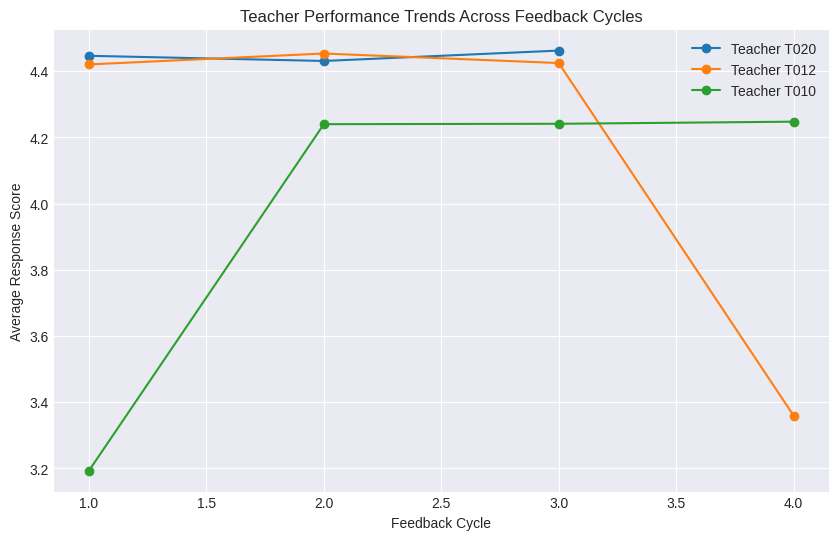

In [17]:
#Visuals


import matplotlib.pyplot as plt

# Pick representative teachers from each trend category
sample_teachers = (
    teacher_performance
    .groupby('Trend_Category')
    .head(1)
    .index
    .tolist()
)

plt.figure(figsize=(10, 6))

for teacher_id in sample_teachers:
    sub = teacher_cycle_scores[teacher_cycle_scores['TeacherID'] == teacher_id]
    plt.plot(
        sub['CycleNumber'],
        sub['ResponseScore'],
        marker='o',
        label=f'Teacher {teacher_id}'
    )

plt.xlabel('Feedback Cycle')
plt.ylabel('Average Response Score')
plt.title('Teacher Performance Trends Across Feedback Cycles')
plt.legend()
plt.grid(True)
plt.show()


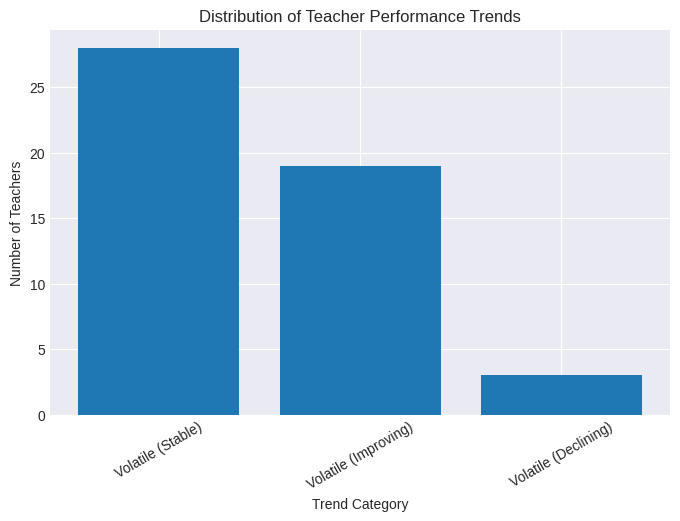

In [18]:
trend_counts = teacher_performance['Trend_Category'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(trend_counts.index, trend_counts.values)
plt.xlabel('Trend Category')
plt.ylabel('Number of Teachers')
plt.title('Distribution of Teacher Performance Trends')
plt.xticks(rotation=30)
plt.show()


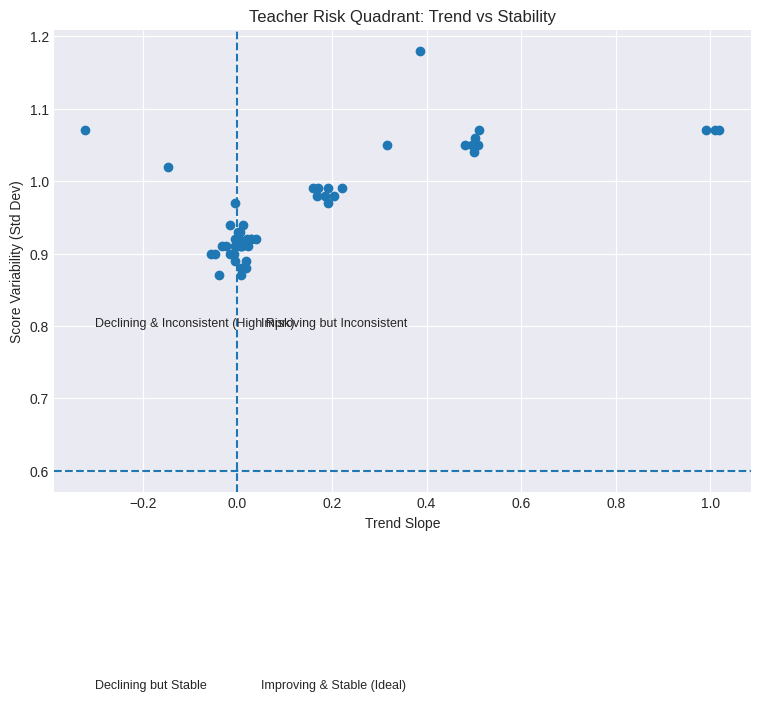

In [19]:
plt.figure(figsize=(9, 6))

plt.scatter(
    teacher_performance['Trend_Slope'],
    teacher_performance['Std_Dev']
)

plt.axvline(0, linestyle='--')
plt.axhline(0.6, linestyle='--')

plt.text(0.05, 0.8, 'Improving but Inconsistent', fontsize=9)
plt.text(-0.3, 0.8, 'Declining & Inconsistent (High Risk)', fontsize=9)
plt.text(-0.3, 0.3, 'Declining but Stable', fontsize=9)
plt.text(0.05, 0.3, 'Improving & Stable (Ideal)', fontsize=9)

plt.xlabel('Trend Slope')
plt.ylabel('Score Variability (Std Dev)')
plt.title('Teacher Risk Quadrant: Trend vs Stability')

plt.show()


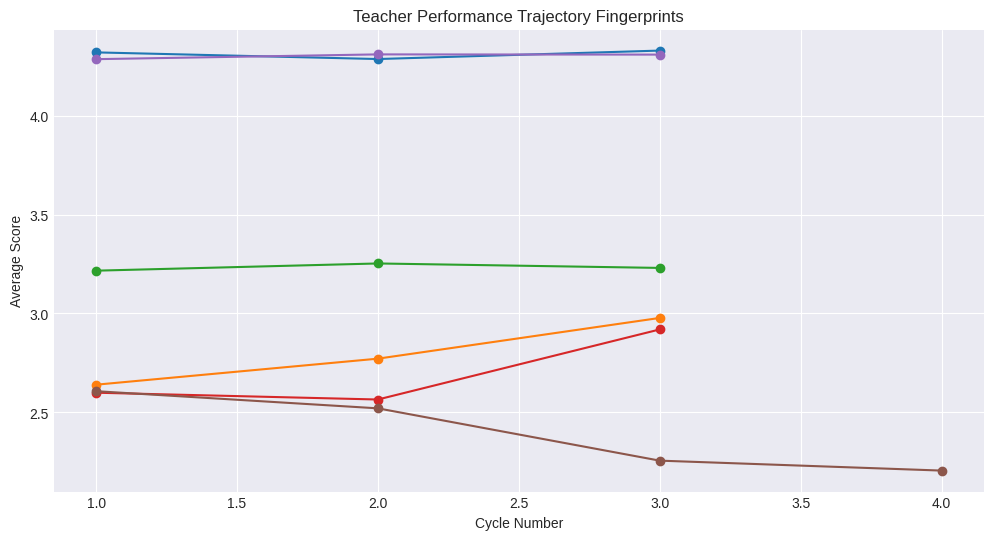

In [20]:
sample_ids = teacher_performance.sample(6, random_state=42).index

plt.figure(figsize=(12, 6))

for tid in sample_ids:
    sub = teacher_cycle_scores[teacher_cycle_scores['TeacherID'] == tid]
    plt.plot(sub['CycleNumber'], sub['ResponseScore'], marker='o')

plt.xlabel('Cycle Number')
plt.ylabel('Average Score')
plt.title('Teacher Performance Trajectory Fingerprints')
plt.show()


In [21]:
import numpy as np
import pandas as pd

# --------------------------- SAFETY CHECKS ---------------------------
# Fill missing columns with default values if they don't exist
for col, default in [
    ('Trend_Slope', 0),
    ('Std_Dev', 0),
    ('Negative_Momentum_Count', 0),
    ('Avg_Score', teacher_performance['Avg_Score'].mean() if 'Avg_Score' in teacher_performance else 0)
]:
    if col not in teacher_performance.columns:
        teacher_performance[col] = default

# --------------------------- 1. Risk Signal Flags ---------------------------
teacher_performance['Risk_Declining_Trend'] = teacher_performance['Trend_Slope'] < -0.05
teacher_performance['Risk_High_Volatility'] = teacher_performance['Std_Dev'] >= 0.60
teacher_performance['Risk_Repeated_Drops'] = teacher_performance['Negative_Momentum_Count'] >= 2
teacher_performance['Risk_Low_Average'] = teacher_performance['Avg_Score'] < 3.5

# --------------------------- 2. Composite Risk Score ---------------------------
teacher_performance['Risk_Score'] = (
    teacher_performance['Risk_Declining_Trend'].astype(int) +
    teacher_performance['Risk_High_Volatility'].astype(int) +
    teacher_performance['Risk_Repeated_Drops'].astype(int) +
    teacher_performance['Risk_Low_Average'].astype(int)
)

# --------------------------- 3. Risk Level Classification ---------------------------
def classify_risk(score):
    if score >= 3:
        return 'High Risk'
    elif score == 2:
        return 'Medium Risk'
    elif score == 1:
        return 'Low Risk'
    else:
        return 'No Immediate Risk'

teacher_performance['Risk_Level'] = teacher_performance['Risk_Score'].apply(classify_risk)

# --------------------------- 4. Summary Output ---------------------------
print("\n" + "="*80)
print("EARLY WARNING SYSTEM SUMMARY")
print("="*80)

print("\nRisk Level Distribution:")
print(teacher_performance['Risk_Level'].value_counts())

print("\nHIGH RISK TEACHERS (Immediate Attention Required):")
display(
    teacher_performance[
        teacher_performance['Risk_Level'] == 'High Risk'
    ][[
        'Avg_Score',
        'Trend_Slope',
        'Std_Dev',
        'Negative_Momentum_Count',
        'Risk_Score'
    ]].sort_values('Risk_Score', ascending=False)
)



EARLY WARNING SYSTEM SUMMARY

Risk Level Distribution:
Risk_Level
Low Risk       29
Medium Risk    19
High Risk       2
Name: count, dtype: int64

HIGH RISK TEACHERS (Immediate Attention Required):


,Avg_Score,Trend_Slope,Std_Dev,Negative_Momentum_Count,Risk_Score
TeacherID,,,,,
T038,3.16,-0.056526,0.90,0,3
T043,2.39,-0.146811,1.02,0,3


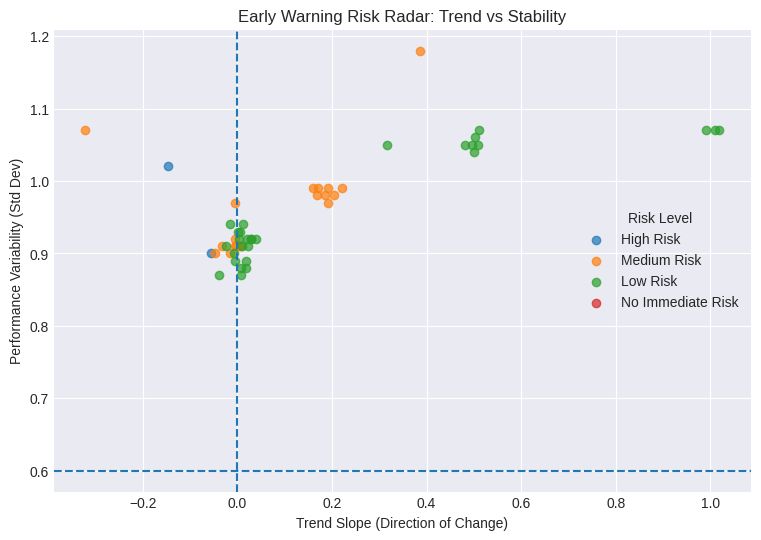

In [22]:
plt.figure(figsize=(9, 6))

# Plot each risk group separately for semantic coloring
risk_colors = {
    'High Risk': 'red',
    'Medium Risk': 'orange',
    'Low Risk': 'gold',
    'No Immediate Risk': 'green'
}

for risk_level, color in risk_colors.items():
    subset = teacher_performance[
        teacher_performance['Risk_Level'] == risk_level
    ]

    plt.scatter(
        subset['Trend_Slope'],
        subset['Std_Dev'],
        label=risk_level,
        alpha=0.7
    )

# Reference lines
plt.axvline(0, linestyle='--')
plt.axhline(0.6, linestyle='--')

plt.xlabel('Trend Slope (Direction of Change)')
plt.ylabel('Performance Variability (Std Dev)')
plt.title('Early Warning Risk Radar: Trend vs Stability')




plt.legend(title='Risk Level')

plt.show()


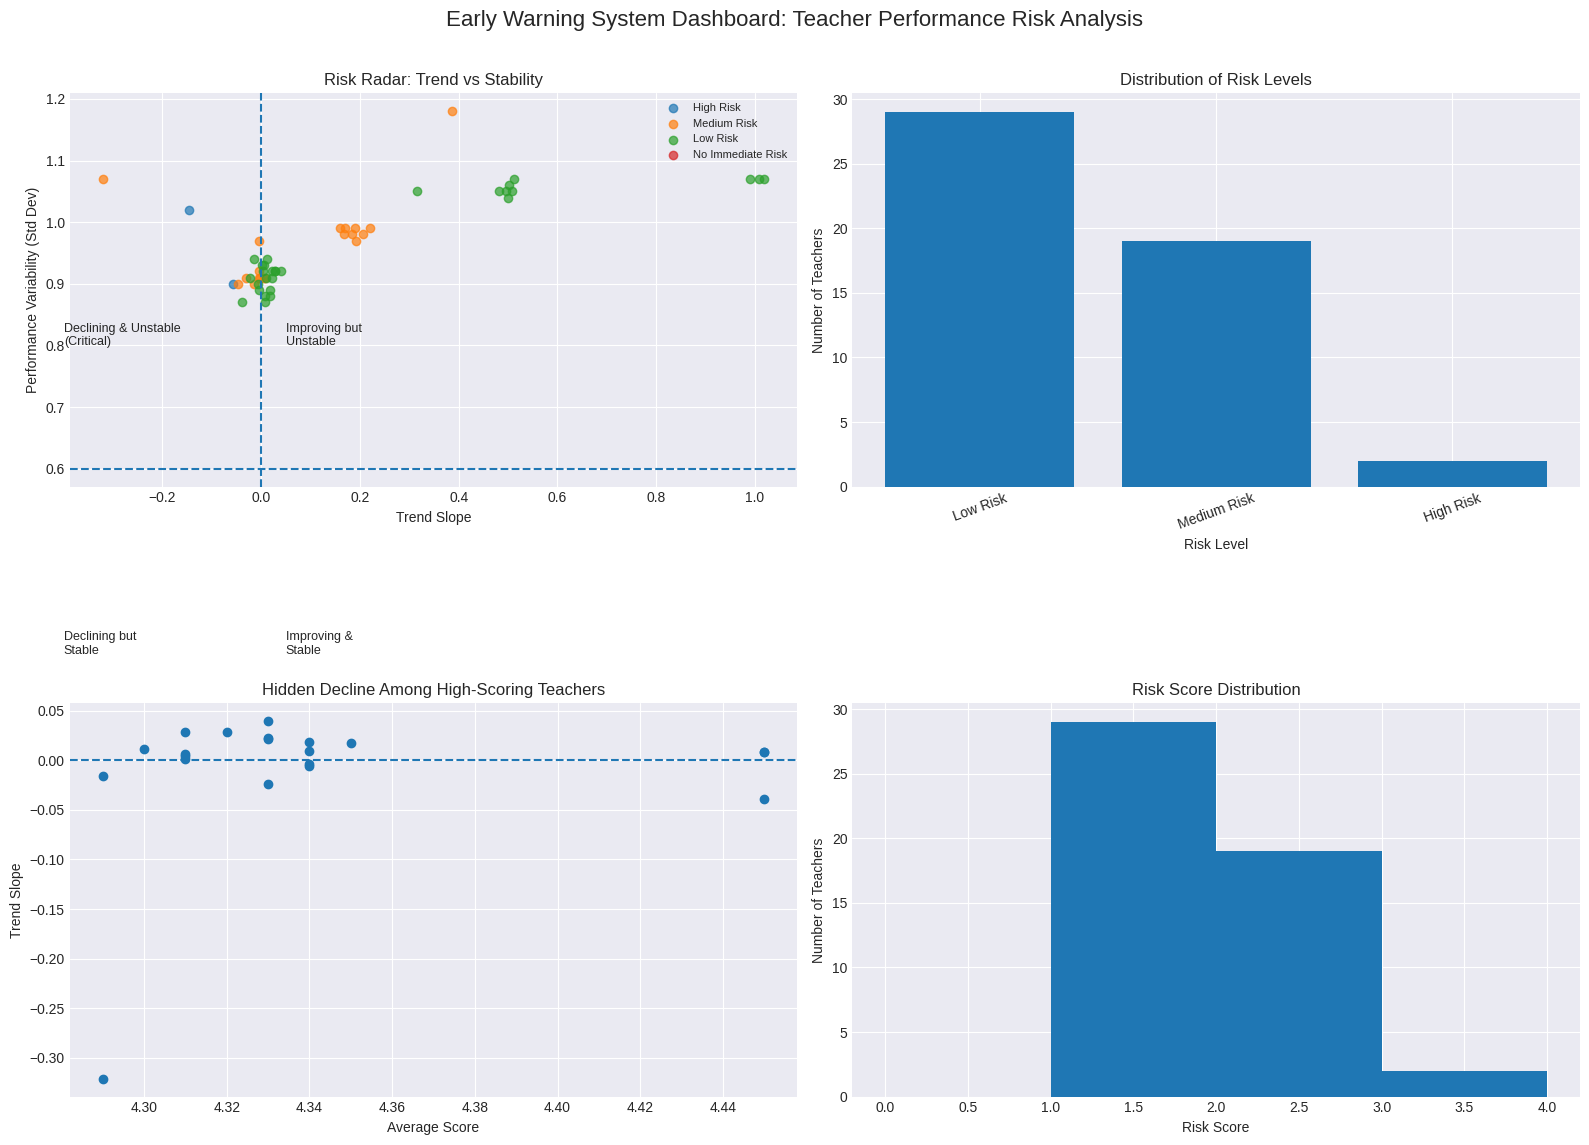

In [23]:
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure(figsize=(16, 12))
fig.suptitle(
    'Early Warning System Dashboard: Teacher Performance Risk Analysis',
    fontsize=16,
    y=0.95
)

# ------------------------------------------------------------
# (1) RISK RADAR: Trend vs Stability
# ------------------------------------------------------------
ax1 = fig.add_subplot(2, 2, 1)

risk_colors = {
    'High Risk': 'red',
    'Medium Risk': 'orange',
    'Low Risk': 'gold',
    'No Immediate Risk': 'green'
}

for risk_level, color in risk_colors.items():
    subset = teacher_performance[
        teacher_performance['Risk_Level'] == risk_level
    ]
    ax1.scatter(
        subset['Trend_Slope'],
        subset['Std_Dev'],
        label=risk_level,
        alpha=0.7
    )

ax1.axvline(0, linestyle='--')
ax1.axhline(0.6, linestyle='--')

ax1.set_xlabel('Trend Slope')
ax1.set_ylabel('Performance Variability (Std Dev)')
ax1.set_title('Risk Radar: Trend vs Stability')
ax1.legend(fontsize=8)

ax1.text(-0.4, 0.8, 'Declining & Unstable\n(Critical)', fontsize=9)
ax1.text(0.05, 0.8, 'Improving but\nUnstable', fontsize=9)
ax1.text(-0.4, 0.3, 'Declining but\nStable', fontsize=9)
ax1.text(0.05, 0.3, 'Improving &\nStable', fontsize=9)

# ------------------------------------------------------------
# (2) RISK LEVEL DISTRIBUTION
# ------------------------------------------------------------
ax2 = fig.add_subplot(2, 2, 2)

risk_counts = teacher_performance['Risk_Level'].value_counts()

ax2.bar(
    risk_counts.index,
    risk_counts.values
)

ax2.set_title('Distribution of Risk Levels')
ax2.set_ylabel('Number of Teachers')
ax2.set_xlabel('Risk Level')
ax2.tick_params(axis='x', rotation=20)

# ------------------------------------------------------------
# (3) HIDDEN DECLINE AMONG HIGH PERFORMERS
# ------------------------------------------------------------
ax3 = fig.add_subplot(2, 2, 3)

high_perf = teacher_performance[
    teacher_performance['Avg_Score'] >= 4.0
]

ax3.scatter(
    high_perf['Avg_Score'],
    high_perf['Trend_Slope']
)

ax3.axhline(0, linestyle='--')

ax3.set_xlabel('Average Score')
ax3.set_ylabel('Trend Slope')
ax3.set_title('Hidden Decline Among High-Scoring Teachers')

# ------------------------------------------------------------
# (4) RISK SCORE DISTRIBUTION
# ------------------------------------------------------------
ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(
    teacher_performance['Risk_Score'],
    bins=[0, 1, 2, 3, 4]
)

ax4.set_xlabel('Risk Score')
ax4.set_ylabel('Number of Teachers')
ax4.set_title('Risk Score Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


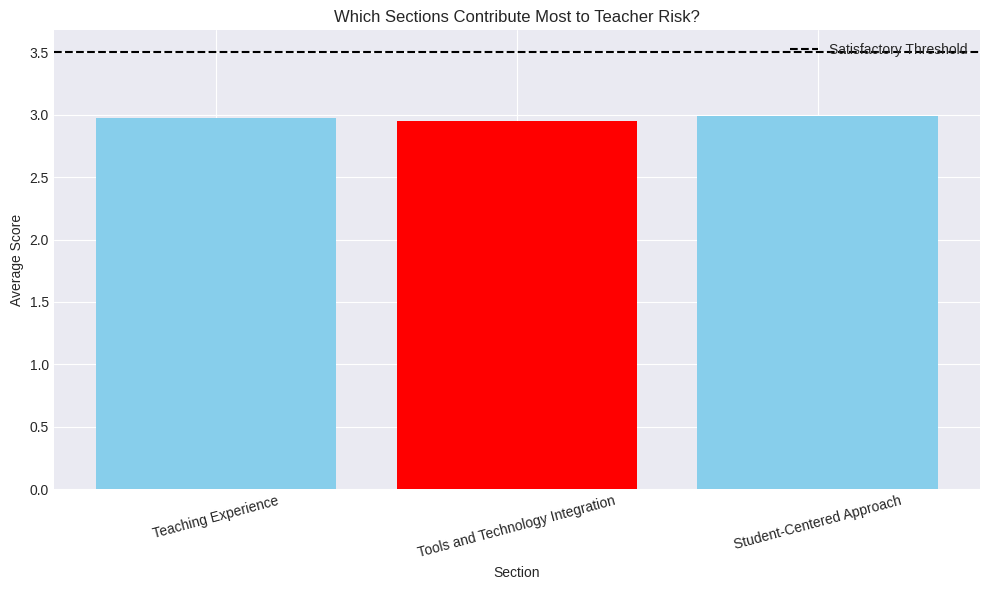

Weakest Section across risked teachers: Tools and Technology Integration


In [24]:
import matplotlib.pyplot as plt

# -----------------------------
# SECTION CONTRIBUTION TO RISK
# -----------------------------

# Mapping section codes to descriptive names
section_names = {
    'A': 'Teaching Experience',
    'B': 'Tools and Technology Integration',
    'C': 'Student-Centered Approach'
}

# Identify risked teachers (High + Medium Risk)
risked_teachers = teacher_performance[
    teacher_performance['Risk_Level'].isin(['High Risk', 'Medium Risk'])
].index

# Filter transformed df for these teachers
risked_data = df_transformed[df_transformed['TeacherID'].isin(risked_teachers)].copy()

# Compute average per Section across all risked teachers
section_avg = risked_data.groupby('Section')['ResponseScore'].mean()

# Rename sections for plotting
section_avg.index = section_avg.index.map(section_names)

# Plot
plt.figure(figsize=(10, 6))
colors = ['skyblue' if s != section_avg.idxmin() else 'red' for s in section_avg.index]  # highlight weakest
plt.bar(section_avg.index, section_avg.values, color=colors)
plt.axhline(3.5, linestyle='--', color='black', label='Satisfactory Threshold')
plt.xticks(rotation=15)
plt.xlabel('Section')
plt.ylabel('Average Score')
plt.title('Which Sections Contribute Most to Teacher Risk?')
plt.legend()
plt.tight_layout()
plt.show()

print("Weakest Section across risked teachers:", section_avg.idxmin())


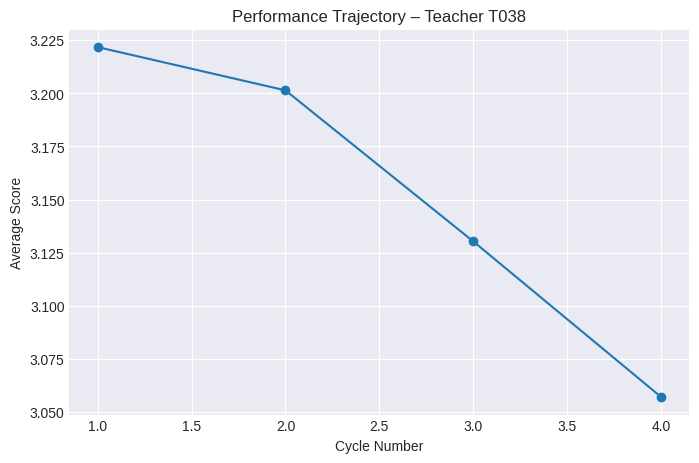

In [27]:
high_risk_teacher = (
    teacher_performance[teacher_performance['Risk_Level'] == 'High Risk']
    .index[0]
)

sub = teacher_cycle_scores[
    teacher_cycle_scores['TeacherID'] == high_risk_teacher
]

plt.figure(figsize=(8, 5))
plt.plot(sub['CycleNumber'], sub['ResponseScore'], marker='o')
plt.xlabel('Cycle Number')
plt.ylabel('Average Score')
plt.title(f'Performance Trajectory – Teacher {high_risk_teacher}')
plt.show()


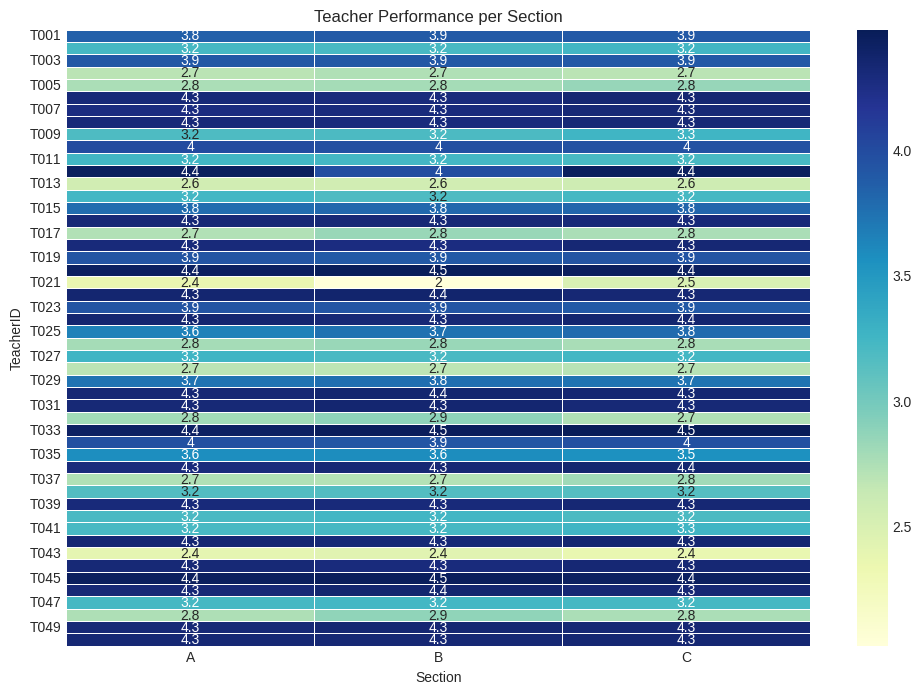

In [183]:
#Teacher's Good At Certain Sections

# Section-wise teacher averages
section_scores = df_transformed.groupby(['TeacherID', 'Section'])['ResponseScore'].mean().reset_index()

# Pivot for easier plotting
section_scores_pivot = section_scores.pivot(index='TeacherID', columns='Section', values='ResponseScore')
section_scores_pivot.fillna(0, inplace=True)  # in case a teacher has missing section responses

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(section_scores_pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Teacher Performance per Section')
plt.xlabel('Section')
plt.ylabel('TeacherID')
plt.show()



/tmp/ipython-input-3461120754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=section_scores_section, x='TeacherID', y='ResponseScore', palette='viridis')


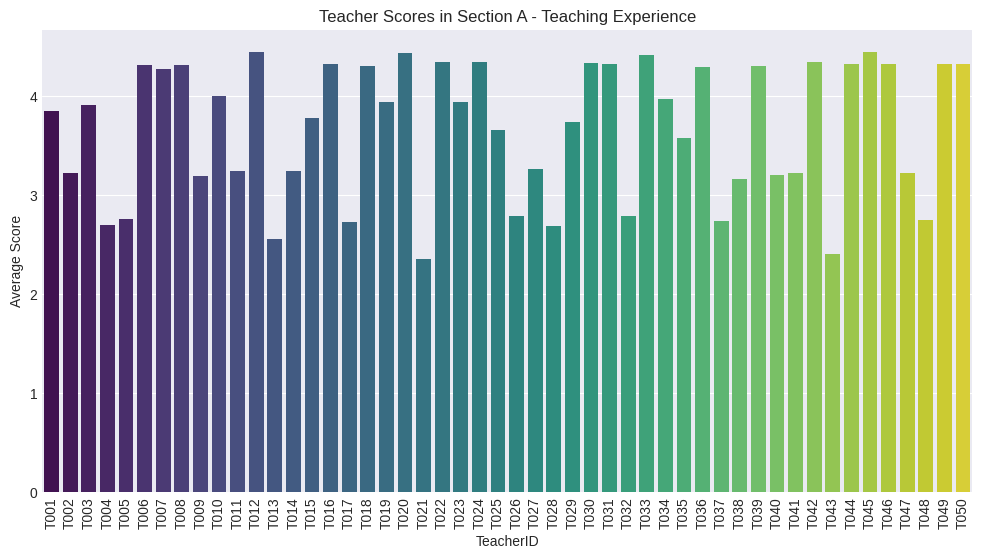

In [185]:
section = 'A'  # Teaching Experience
section_scores_section = section_scores[section_scores['Section'] == section]

plt.figure(figsize=(12,6))
sns.barplot(data=section_scores_section, x='TeacherID', y='ResponseScore', palette='viridis')
plt.title(f'Teacher Scores in Section {section} - Teaching Experience')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()


#Extra Ordinary Questions Polarization

In [28]:
import pandas as pd

def compute_polarization(df_section):
    # Extreme responses
    extreme = df_section[(df_section['ResponseScore'] <= 2) | (df_section['ResponseScore'] >= 4)]
    # Polarization index
    polarization_index = len(extreme) / len(df_section)
    return polarization_index

# Section-wise polarization per teacher
polarization = df_transformed.groupby(['TeacherID', 'Section']).apply(compute_polarization).reset_index()
polarization.rename(columns={0:'Polarization_Index'}, inplace=True)


/tmp/ipython-input-1147120862.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polarization = df_transformed.groupby(['TeacherID', 'Section']).apply(compute_polarization).reset_index()


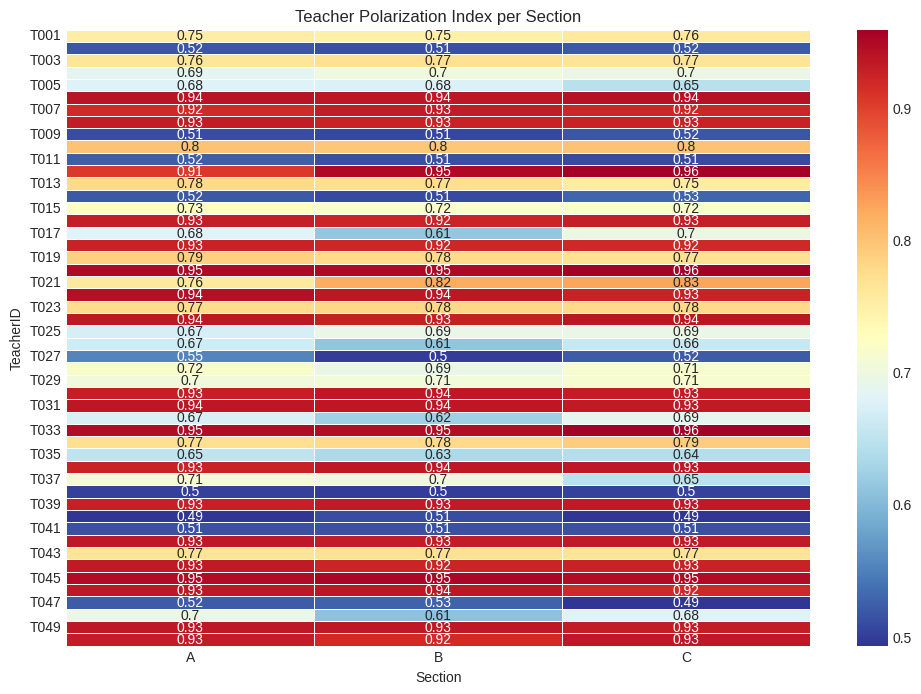

In [29]:
# Pivot for heatmap
polarization_pivot = polarization.pivot(index='TeacherID', columns='Section', values='Polarization_Index')
polarization_pivot.fillna(0, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(polarization_pivot, annot=True, cmap='RdYlBu_r', linewidths=0.5)
plt.title('Teacher Polarization Index per Section')
plt.xlabel('Section')
plt.ylabel('TeacherID')
plt.show()


/tmp/ipython-input-1794404545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_polarized, x='TeacherID', y='Avg_Polarization', palette='coolwarm')


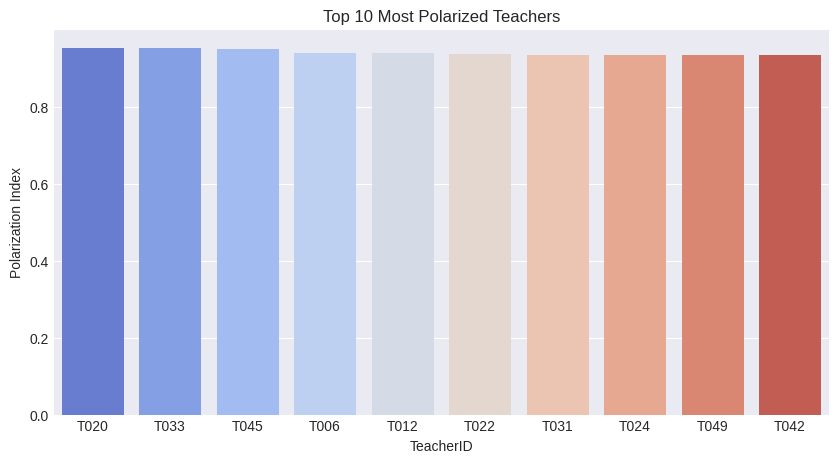

In [30]:
# Top 10 most polarized teachers (average across sections)
polarization['Avg_Polarization'] = polarization.groupby('TeacherID')['Polarization_Index'].transform('mean')
top_polarized = polarization[['TeacherID','Avg_Polarization']].drop_duplicates().nlargest(10, 'Avg_Polarization')

plt.figure(figsize=(10,5))
sns.barplot(data=top_polarized, x='TeacherID', y='Avg_Polarization', palette='coolwarm')
plt.title('Top 10 Most Polarized Teachers')
plt.ylabel('Polarization Index')
plt.show()


In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import pointbiserialr

# -------------------------
# 1. Prepare Teacher Metrics
# -------------------------

# Average score per teacher per section
avg_scores = df_transformed.groupby(['TeacherID','Section'])['ResponseScore'].mean().reset_index(name='Avg_Score')

# Polarization Index: fraction of extreme responses (1-2 or 4-5)
def compute_polarization(df_section):
    extreme = df_section[(df_section['ResponseScore'] <= 2) | (df_section['ResponseScore'] >= 4)]
    return len(extreme)/len(df_section)

polarization = df_transformed.groupby(['TeacherID','Section']).apply(compute_polarization).reset_index(name='Polarization_Index')

# Merge metrics
dashboard_df = avg_scores.merge(polarization, on=['TeacherID','Section'])

# Performance Category
def categorize(score):
    if score >= 4.5: return 'Excellent'
    elif score >= 4: return 'Good'
    elif score >= 3.5: return 'Satisfactory'
    elif score >= 3: return 'Needs Improvement'
    else: return 'Poor'

dashboard_df['Performance_Category'] = dashboard_df['Avg_Score'].apply(categorize)

# Count responses per teacher
response_count = df_transformed.groupby(['TeacherID','Section']).size().reset_index(name='Total_Responses')
dashboard_df = dashboard_df.merge(response_count, on=['TeacherID','Section'])

# -------------------------
# 2. Prepare Diverging Stacked Bar (Polarization)
# -------------------------
response_frac = df_transformed.groupby(['TeacherID','ResponseScore']).size().reset_index(name='Count')
response_frac = response_frac.merge(df_transformed.groupby('TeacherID').size().reset_index(name='Total'), on='TeacherID')
response_frac['Fraction'] = response_frac['Count']/response_frac['Total']

# Pivot to get each ResponseScore as column
response_pivot = response_frac.pivot(index='TeacherID', columns='ResponseScore', values='Fraction').fillna(0)

# Shift low responses (<3) to negative for diverging effect
for col in [1,2]:
    if col in response_pivot.columns:
        response_pivot[col] = -response_pivot[col]

response_pivot = response_pivot.reset_index()
melted = response_pivot.melt(id_vars='TeacherID', value_name='Fraction', var_name='ResponseScore')

fig_polarization = px.bar(
    melted,
    x='Fraction',
    y='TeacherID',
    color='ResponseScore',
    orientation='h',
    title='Teacher Response Distribution (Polarization)',
    color_discrete_map={1:'red',2:'orange',3:'yellow',4:'lightgreen',5:'green'},
    hover_data={'Fraction':':.2f', 'ResponseScore':True, 'TeacherID':True}
)
fig_polarization.update_layout(
    xaxis_title='Fraction of Responses',
    yaxis_title='TeacherID',
    barmode='relative',
    annotations=[
        dict(x=0, y=-0.5, xref='x', yref='y',
             text="Polarization: Large mix of negative (red/orange) and positive (green) responses → High polarization",
             showarrow=False)
    ]
)
fig_polarization.show()

# -------------------------
# 3. Bubble Chart: Avg Score vs Polarization
# -------------------------
fig_bubble = px.scatter(
    dashboard_df,
    x='Avg_Score',
    y='Polarization_Index',
    size='Total_Responses',
    color='Performance_Category',
    hover_data=['TeacherID','Section','Avg_Score','Polarization_Index','Total_Responses'],
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='Teacher Performance vs Polarization (Bubble Chart)'
)
fig_bubble.update_layout(
    xaxis_title='Average Score',
    yaxis_title='Polarization Index',
    annotations=[
        dict(x=4.8, y=0.6, xref="x", yref="y",
             text="High Avg + High Polarization → hidden conflicts",
             showarrow=True, arrowhead=2),
        dict(x=3.2, y=0.2, xref="x", yref="y",
             text="Low Avg + Low Polarization → agreed poor performance",
             showarrow=True, arrowhead=2)
    ]
)
fig_bubble.show()

# -------------------------
# 4. Lollipop Chart: Discrimination Power
# -------------------------
teacher_avg = df_transformed.groupby('TeacherID')['ResponseScore'].mean().reset_index(name='Teacher_Avg')
median_score = teacher_avg['Teacher_Avg'].median()
teacher_avg['High_Performer'] = (teacher_avg['Teacher_Avg'] >= median_score).astype(int)
df_dp = df_transformed.merge(teacher_avg[['TeacherID','High_Performer']], on='TeacherID')

discrimination = {}
for q in df_dp['QuestionID'].unique():
    subset = df_dp[df_dp['QuestionID']==q]
    corr, _ = pointbiserialr(subset['High_Performer'], subset['ResponseScore'])
    discrimination[q] = corr

dp_df = pd.DataFrame(list(discrimination.items()), columns=['QuestionID','Discrimination_Power'])

# Drop NaN values (fix for Plotly size error)
dp_df = dp_df.dropna(subset=['Discrimination_Power'])
dp_df = dp_df.sort_values(by='Discrimination_Power', ascending=True)

fig_lollipop = px.scatter(
    dp_df,
    x='Discrimination_Power',
    y='QuestionID',
    size='Discrimination_Power',
    color='Discrimination_Power',
    color_continuous_scale='Viridis',
    title='Question Discrimination Power (Lollipop Chart)',
    hover_data={'Discrimination_Power':':.2f','QuestionID':True}
)

# Add lines for lollipop effect
for idx, row in dp_df.reset_index().iterrows():
    fig_lollipop.add_shape(type='line',
                           x0=0, x1=row['Discrimination_Power'],
                           y0=idx, y1=idx,
                           line=dict(color='gray', width=1))

fig_lollipop.update_layout(
    xaxis_title='Discrimination Power (Point-Biserial Correlation)',
    yaxis_title='QuestionID',
    annotations=[
        dict(x=0.5, y=1.05, xref='paper', yref='paper',
             text="Higher DP → question differentiates high vs low performers better",
             showarrow=False),
        dict(x=0.5, y=1.0, xref='paper', yref='paper',
             text="Negative DP → question may favor weaker teachers",
             showarrow=False)
    ]
)
fig_lollipop.show()


/tmp/ipython-input-77307887.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polarization = df_transformed.groupby(['TeacherID','Section']).apply(compute_polarization).reset_index(name='Polarization_Index')
